In [18]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_train, y_train) = fashion_mnist.load_data()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ann import ann
import ann_utils
import gd

In [20]:
# Parameters
epochs = 10

In [21]:
## Functions
ann.activation = ann_utils.relu
ann.d_activation = ann_utils.d_relu
ann.weight_init = ann_utils.xavier_init

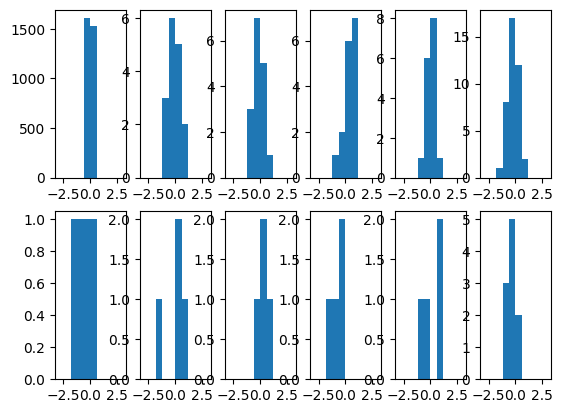

In [22]:
ann.num_layers = 5
ann.hidden_size = 4
nn = ann(28 * 28, 10)
ann_utils.view_weights_distribution(nn, num_layers = ann.num_layers)

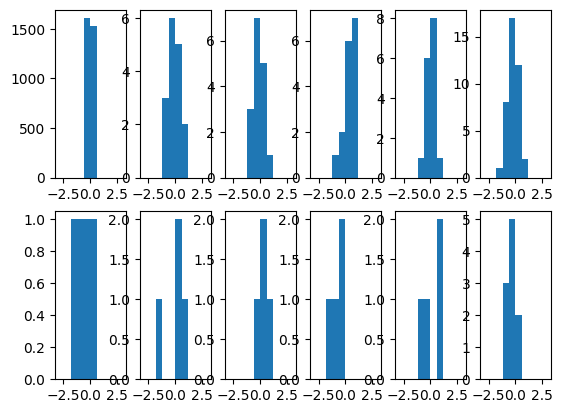

In [23]:
len(nn.Ws)
y = nn.forward_prop(X_train[0]/255)
ann_utils.view_weights_distribution(nn, num_layers = ann.num_layers)

In [24]:
nn.a

[array([[-1.05814661],
        [ 0.30734576],
        [-1.3065288 ],
        [-0.34991846]]),
 array([[ 0.4841125 ],
        [ 0.74745605],
        [-1.55752114],
        [ 0.1991403 ]]),
 array([[-0.9376816 ],
        [-0.40013838],
        [ 1.5708846 ],
        [-0.30326465]]),
 array([[ 1.22770467],
        [-1.17838208],
        [-0.88431759],
        [-0.8169365 ]]),
 array([[ 1.25415433],
        [ 0.3136478 ],
        [-0.96803202],
        [-2.27969881]])]

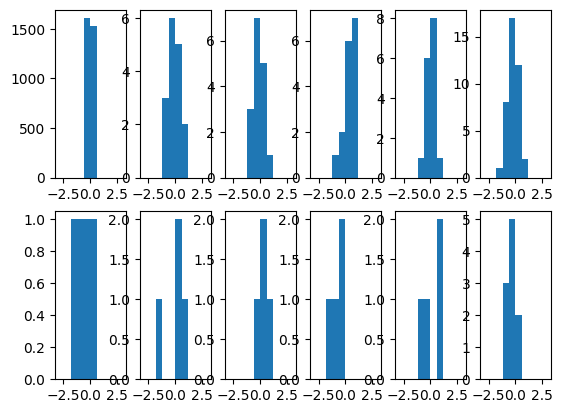

In [25]:
nn.back_prop(y_train[0])
ann_utils.view_weights_distribution(nn, num_layers = ann.num_layers)

In [26]:
for i in range(epochs):
    print(i)
    gd.sgd(nn, X_train/255, y_train)

0
1
2
3
4
5
6
7
8
9


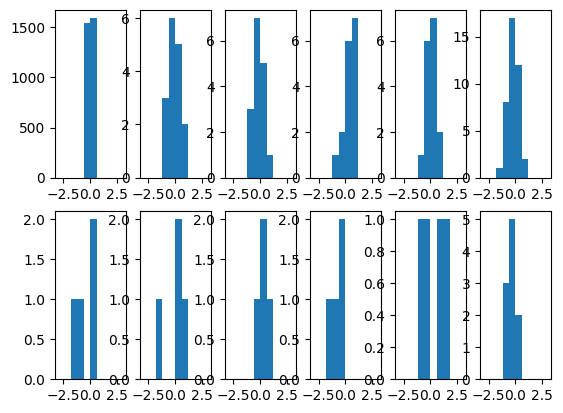

In [27]:
ann_utils.view_weights_distribution(nn, num_layers = ann.num_layers)

In [28]:
nn.predict(X_train[0]/255)
y_train[0:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [29]:
u = nn.predict(X_train[0]/255)
ua = nn.a
v = nn.predict(X_train[100])
va = nn.a
np.linalg.norm(u - v)

uh = nn.h
vh = nn.h

In [30]:
diff = []
diff_h = []
for i in range(len(ua)):
    diff.append(np.linalg.norm(ua[i] - va[i]))
    diff_h.append(np.linalg.norm(uh[i] - vh[i]))

print(ua[0])
print(va[0])

print(uh[0])
print(vh[0])

[[-1.05814661]
 [ 2.41953875]
 [-1.3065288 ]
 [-0.32759467]]
[[ -0.29857251]
 [296.76118634]
 [ 92.30892466]
 [-66.35314364]]
[[  0.        ]
 [296.76118634]
 [ 92.30892466]
 [  0.        ]]
[[  0.        ]
 [296.76118634]
 [ 92.30892466]
 [  0.        ]]


In [31]:
for i in range(len(ua)):
    print(ua[i] - va[i])

[[  -0.7595741 ]
 [-294.34164759]
 [ -93.61545346]
 [  66.02554897]]
[[-63.20405664]
 [-26.93544679]
 [-71.21588351]
 [-38.05574292]]
[[ 39.9314058 ]
 [ 52.6052767 ]
 [-24.06518485]
 [ 36.3320245 ]]
[[-22.54529208]
 [ -5.36375133]
 [  0.83117213]
 [  4.6283285 ]]
[[-14.53720237]
 [  3.41248043]
 [  5.91951075]
 [ 19.56027221]]


In [32]:
print(ua[1])
print(va[1])

[[ 1.52906285]
 [ 1.30941485]
 [-1.71397196]
 [ 0.72905998]]
[[64.73311949]
 [28.24486164]
 [69.50191155]
 [38.7848029 ]]


In [33]:
uu = nn.Ws[1] @ ua[1] + nn.bs[1]
vv = nn.Ws[1] @ va[1] + nn.bs[1]
print(ann.activation(uu))
print(ann.activation(vv))

[[2.70789802]
 [0.41470173]
 [0.        ]
 [2.52140022]]
[[ 0.        ]
 [ 0.        ]
 [13.43838211]
 [42.73083606]]


In [34]:
nn.h

[array([[  0.        ],
        [296.76118634],
        [ 92.30892466],
        [  0.        ]]),
 array([[64.73311949],
        [28.24486164],
        [69.50191155],
        [38.7848029 ]]),
 array([[ 0.        ],
        [ 0.        ],
        [26.54703687],
        [ 0.        ]]),
 array([[24.62077233],
        [ 4.38840957],
        [ 0.        ],
        [ 0.        ]]),
 array([[16.88382099],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]])]